In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 50
batch_size = 64
folder_name = 'AXO_handwritten'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  #sensor_size_to = 45,
                  sensor_size_to = 32,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[CenterCrop(sensor_size=(240, 180, 2), size=(128, 128)), Downsample(time_factor=1, spatial_factor=0.25, sensor_size=None, target_size=None), ToFrame(sensor_size=(32, 32, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 50
dataset_dict

{'num_input': 2048,
 'num_training_samples': 6000,
 'num_output': 3,
 'dataset_name': 'davis',
 'time_ms': 50}

Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 16, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (1): Conv2DSNNLayer(
      (conv): Conv2d(16, 24, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (2): Conv2DSNNLayer(
      (conv): Conv2d(24, 48, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (3): FlattenSNNLayer()
    (4): FeedforwardSNNLayer(
      (linear): Linear(in_features=768, out_features=48, bias=False)
    )
    (5): FeedforwardSNNLayer(
      (linear): Linear(in_features=48, out_features=48, bias=False)
    )
    (6): FeedforwardSNNLayer(
      (linear): Linear(in_features=48, out_features=3, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.25287
Step [62/93], Loss: 0.23473
Step [93/93], Loss: 0.21896
Time elasped: 27.61533260345459
3000
Test Loss: 0.22719547596383602
Avg spk_count per neuron for all 50 time-steps 724.7084444444447


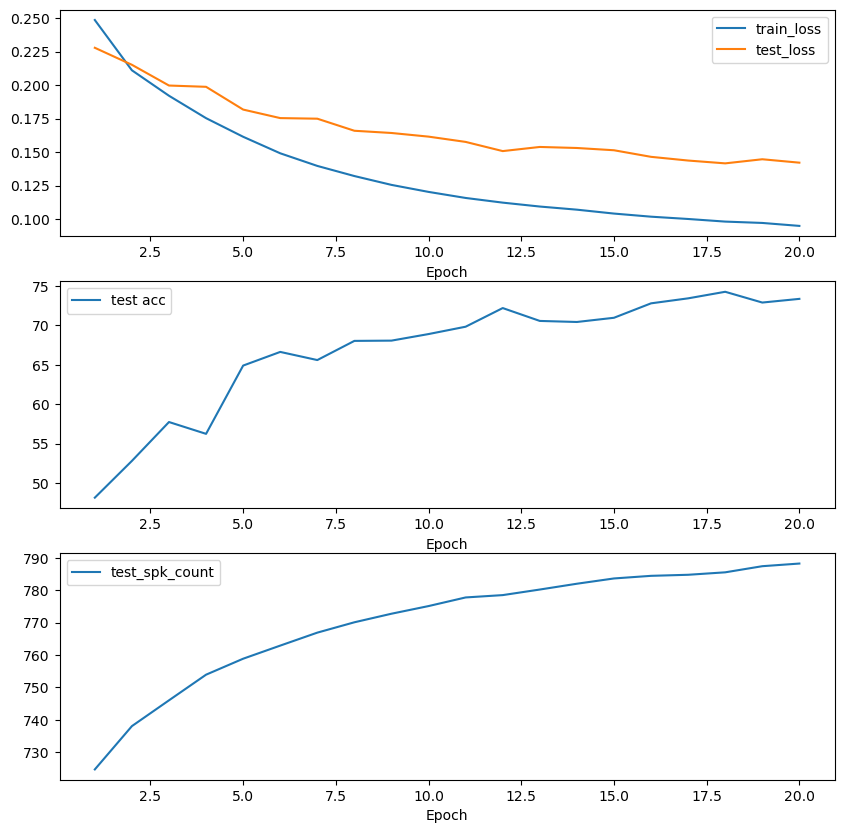

In [5]:
ckpt_dir = 'axo_conv'

structure = (48, 2, 'f')

extra_kwargs = {'conv':[(2, 16, 2), (16, 24, 2), (24, 48, 2)]}

tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

#snn.input2spike_th = 0.5

snn.model_name = 'axo_conv'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 16, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (1): Conv2DSNNLayer(
      (conv): Conv2d(16, 24, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (2): Conv2DSNNLayer(
      (conv): Conv2d(24, 48, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (3): FlattenSNNLayer()
    (4): FeedforwardSNNLayer(
      (linear): Linear(in_features=768, out_features=48, bias=False)
    )
    (5): FeedforwardSNNLayer(
      (linear): Linear(in_features=480, out_features=48, bias=False)
    )
    (6): FeedforwardSNNLayer(
      (linear): Linear(in_features=48, out_features=3, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.25491
Step [62/93], Loss: 0.21715
Step [93/93], Loss: 0.18255
Time elasped: 34.042264223098755
3000
Test Loss: 0.21605796604714494
Avg spk_count per neuron for all 50 time-steps 1333.53922222222

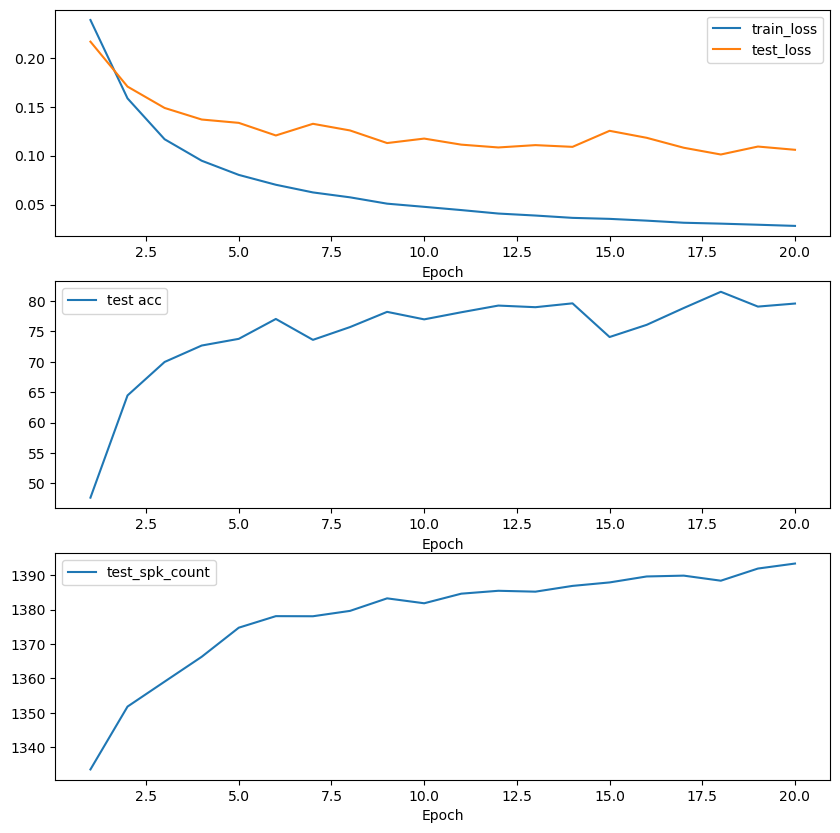

In [7]:
ckpt_dir = 'axo_conv'

structure = (48, 2, 'd')

extra_kwargs = {'conv':[(2, 16, 2), (16, 24, 2), (24, 48, 2)], 'delay_range':(10, 1),
                'pruned_delays': 10}

tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

#snn.input2spike_th = 0.5

snn.model_name = 'axo_conv'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 24, kernel_size=(8, 8), stride=(8, 8), bias=False)
    )
    (1): FlattenSNNLayer()
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=384, out_features=48, bias=False)
    )
    (3): FeedforwardSNNLayer(
      (linear): Linear(in_features=480, out_features=48, bias=False)
    )
    (4): FeedforwardSNNLayer(
      (linear): Linear(in_features=48, out_features=3, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [31/93], Loss: 0.23013
Step [62/93], Loss: 0.19150
Step [93/93], Loss: 0.16494
Time elasped: 107.36656665802002
3000
Test Loss: 0.19771158695220947
Avg spk_count per neuron for all 50 time-steps 539.1655
Test Accuracy of the model on the test samples: 53.933

saving max acc: 53.93333333333333
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_conv
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.13998
Step [62/93], Loss: 0.12027
Step [93/93], Loss: 0.10825
Time elasped: 27.204131841659546
3000
Test Loss: 0.1664471004871612
Avg spk_count per neuron for all 50 time-steps 563.8403333333333
Test Accuracy of the model on the test samples: 63.767

saving max acc: 63.766666666666666
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_conv
Epoch [3/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.11826
Step [62/93], Loss: 0.10091
Step [93/93], Loss: 0.08768
Time elasped: 2

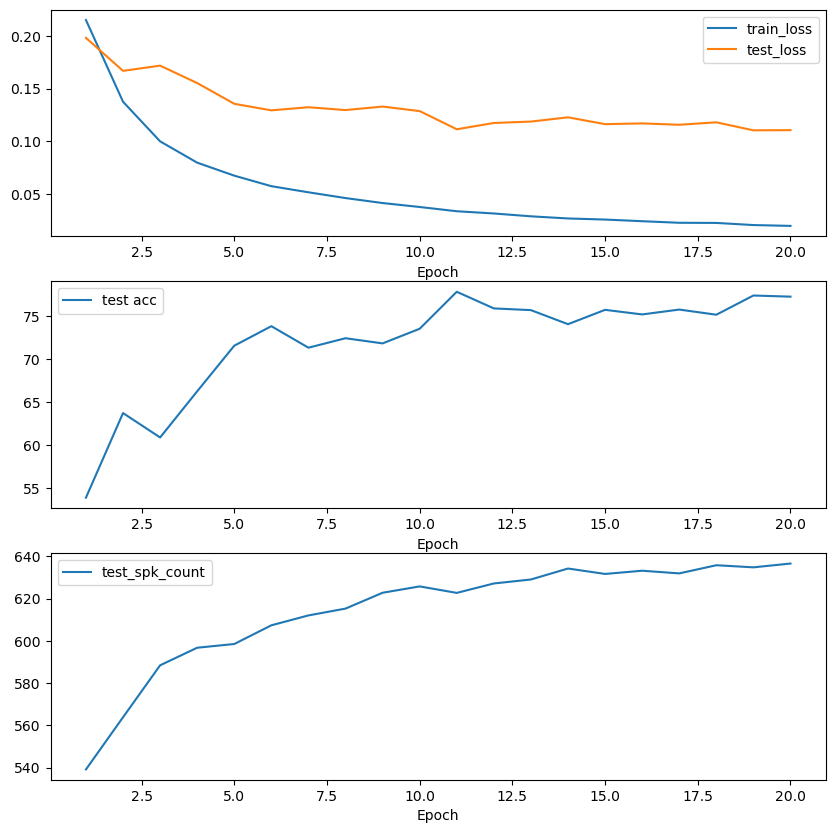

In [3]:
ckpt_dir = 'axo_conv'

structure = (48, 2, 'd')

extra_kwargs = {'conv':[(2, 24, 8)], 'delay_range':(10, 1),
                'pruned_delays': 10}

tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

#snn.input2spike_th = 0.5

snn.model_name = 'axo_conv'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)